## Timeseries forecasting 

### Sunspots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')

In [3]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)

In [4]:
df.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


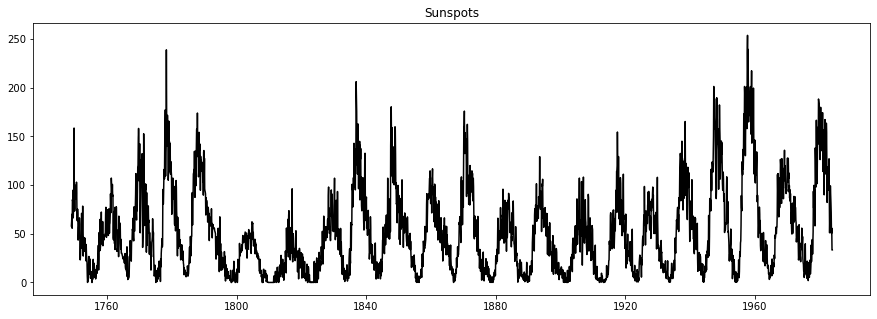

In [5]:
plt.figure(figsize = (15,5))
plt.plot(df, color = 'k')
plt.title('Sunspots')
plt.show()

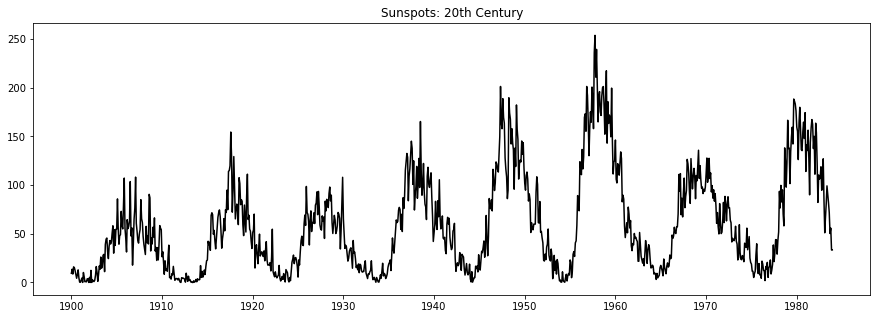

In [6]:
plt.figure(figsize = (15,5))
plt.plot(df['Sunspots']['1900-01-01':], color = 'k')
plt.title('Sunspots: 20th Century')
plt.show()

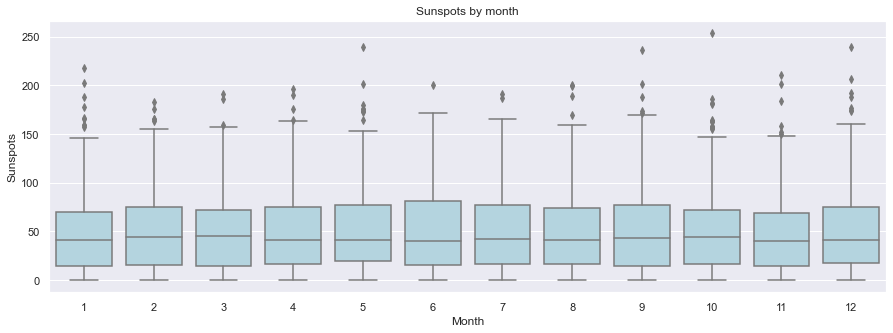

In [7]:
df['Month'] = df.index.month
#Mpnthly 
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = 'Month', y = 'Sunspots', data = df, color = 'lightblue').set(title='Sunspots by month')
plt.show()

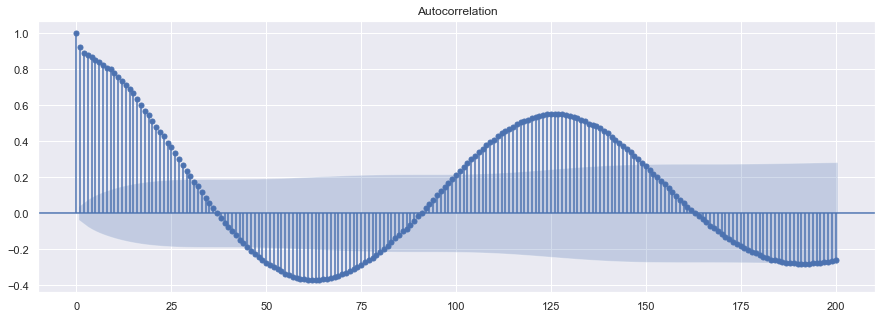

In [8]:
#acf plot - plots autokorrelation
sm.graphics.tsa.plot_acf(df['Sunspots'].values.squeeze(),lags=200)
plt.show()

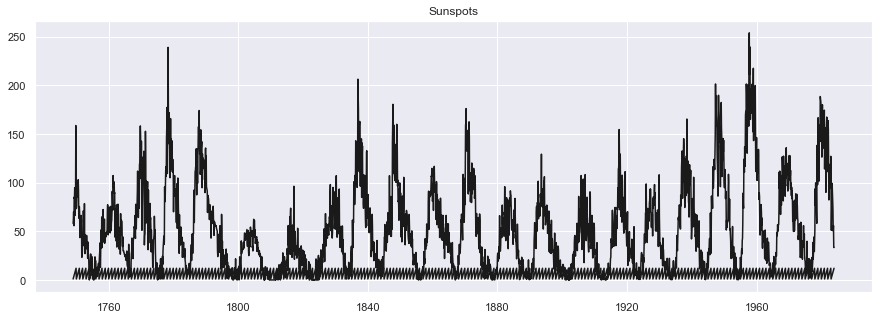

In [9]:
plt.figure(figsize = (15,5))
plt.plot(df, color = 'k')
plt.title('Sunspots')
plt.show()

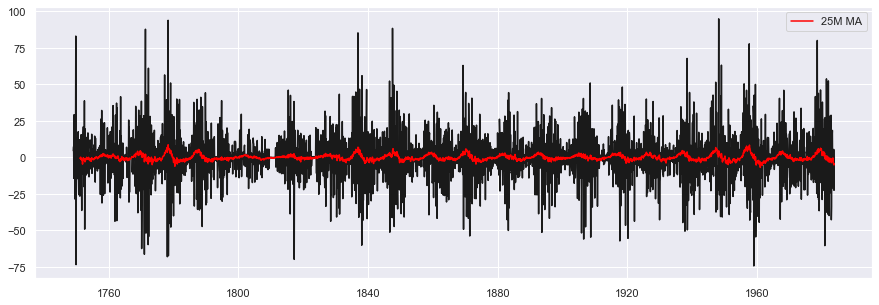

In [10]:
plt.figure(figsize = (15,5))
plt.plot((df['Sunspots']-df['Sunspots'].shift(1)), color = 'k')
plt.plot((df['Sunspots']-df['Sunspots'].shift(1)).rolling(25).mean(), color = 'red', label = '25M MA')
plt.legend()
plt.show()


In [11]:
from statsmodels.tsa.seasonal import STL

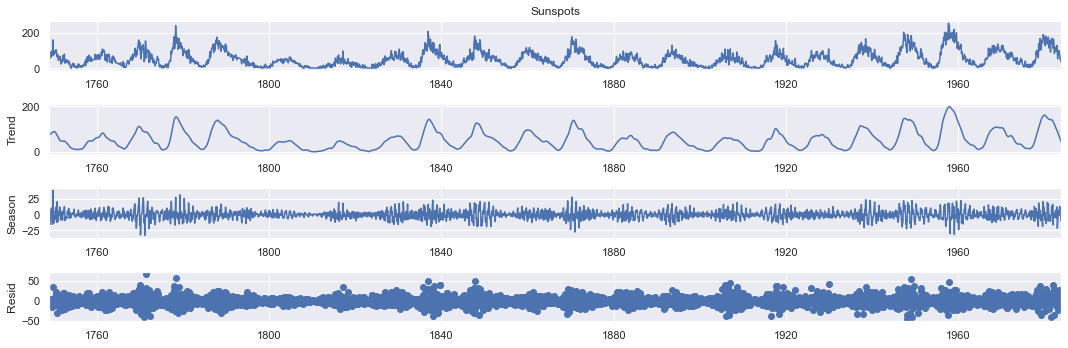

In [12]:
res = STL(df['Sunspots']).fit()
res.plot()
plt.show()

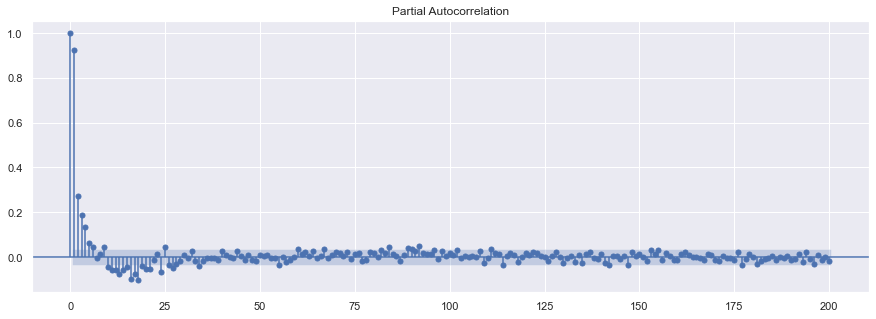

In [13]:
#Partial Autocorrelation
sm.graphics.tsa.plot_pacf(df['Sunspots'].values.squeeze(),lags=200, method = 'ywm')
plt.show()

#### ARIMA Model 

In [23]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")

adfuller_test(df['Sunspots'])

ADF Test Statistic : -9.567667511913081
p-value : 2.3334521438662545e-16
#Lags Used : 27
Number of Observations Used : 2792
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

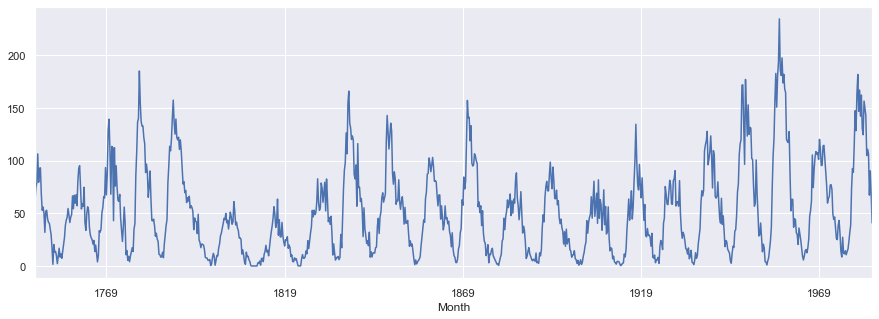

In [37]:
df1 = pd.Series(data=df['Sunspots'], index = df.index)
df1_Q = df1.resample('Q').mean()
df1_Q.plot()

In [38]:
model = sm.tsa.statespace.SARIMAX(df1_Q, trend='n', order=(3,0,10), seasonal_order=(1,1,0,43))
results = model.fit()
print(results.summary())

C:\Users\ingnilss\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                             Sunspots   No. Observations:                  940
Model:             SARIMAX(3, 0, 10)x(1, 1, [], 43)   Log Likelihood               -3799.382
Date:                              Sun, 24 Jul 2022   AIC                           7628.764
Time:                                      17:17:21   BIC                           7700.750
Sample:                                  03-31-1749   HQIC                          7656.267
                                       - 12-31-1983                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0411      1.238      1.649      0.099      -0.385       4.467
ar.L2         -1.24

### Plot the forecast

C:\Users\ingnilss\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


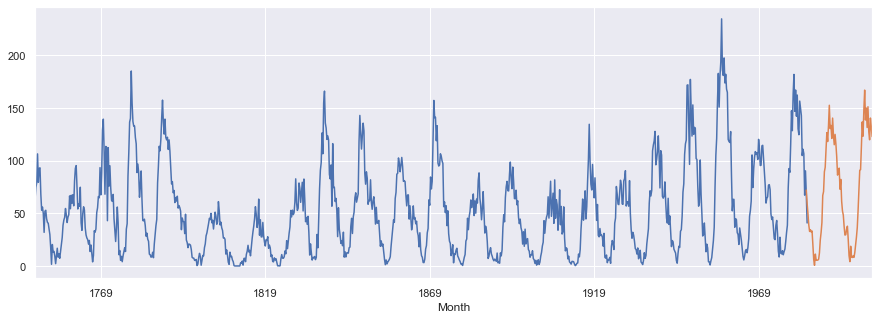

In [45]:
forecast = results.predict(start = df1_Q.index[-2], end = df1_Q.index[-2] + pd.DateOffset(months = 240), dynamic = True)
df1_Q.plot()
forecast.plot()
plt.show()